# Programmering for matematikere

## Modul 7 - Ordbøger og tupler

<div align="center">
Jimmy Jessen Nielsen<br/>
jjn@es.aau.dk
<div/>
<br/>
<div align="center">
Inst. for Elektroniske Systemer<br/>
Aalborg Universitet
</div>

# Del 1 - Ordbøger (dictionaries)

En ordbog kan ses som en *afbildning* (matematisk terminologi) fra ét sæt værdier til et andet.

![Key-value mapping](./key-value-mapping.jpeg "Key-value mapping")
- Den afbilder et sæt *nøgler* (keys) på et sæt *værdier* (values).
- Man kan også tænke på det som, at nøglerne bruges til at slå værdier op - heraf navnet og analogien til ordbøger.
- En ordbog består således af par af hhv. nøgle og værdi; de to hører altid sammen.
Vi kan starte med at lave en tom ordbog (her tænkt som en engelsk-spansk ordbog):

In [6]:
eng2sp = dict()
eng2sp

{}

Bemærk at en ordbog printes med tuborg-paranteser. Denne har intet indhold endnu.

Vi kan f.eks. fylde værdier i en ordbog ved at referere et element i ordbogen med en nøgle og tildele det en værdi:

In [7]:
eng2sp['one'] = 'uno'
eng2sp

{'one': 'uno'}

### Oprettelse

Den syntaks som Python viser output med ovenfor kan man også bruge til at oprette en ordbog:

In [10]:
eng2sp = {'one': 'uno', 'two': 'dos', 'three': 'tres'}
eng2sp

{'one': 'uno', 'two': 'dos', 'three': 'tres'}

Bemærk hvordan nøgle og værdi er adskilt med kolon og nøgle-værdi par er adskilt med komma.

*En sidebemærkning: I bogen viser Downey, at rækkefølgen ikke bevares i eksemplet herover, men det kan godt være tilfældet (Især i de nyeste udgaver af Python som vi bruger). Det korte af det lange er, at vi ikke nødvendigvis regne med at rækkefølgen i en ordbog bibeholdes.*

### Opslag
Imidlertid er det ikke vigtigt, om rækkefølgen af elementer i en ordbog bevares. Vi slår værdier op via deres tilhørende nøgle og er ikke afhængige af at kunne finde dem ved et bestemt indeks(-tal), som hvis vi havde gemt værdierne i en liste. Lad os lave et opslag:

In [4]:
eng2sp['two']

'dos'

Hvad sker der, hvis vi prøver at slå en nøgle op, som ikke findes i ordbogen?

In [12]:
eng2sp['four']

KeyError: 'four'

Det giver en fejlmeddelelse. Vi vender tilbage til hvordan vi kan håndtere sådan en fejl.

Som med bl.a. lister og tupler kan vi også få at vide, hvor lang en ordbog er, vha. `len`:

In [14]:
len(eng2sp)

3

Det skal forstås som antallet af nøgle-værdi par.

Tilsvarende kan vi også bruge `in` til at tjekke, om en given nøgle er til stede i ordbogen:

In [7]:
'one' in eng2sp

True

Bemærk at `in` **ikke** kan bruges til at tjekke om en værdi findes blandt værdierne i ordbogen (den kigger kun på nøglerne):

In [8]:
'uno' in eng2sp

False

Hvis vi vil tjekke en værdi, kan vi få en liste med ordbogens værdier vha. metoden `values` som vi derefter kan tjekke for en bestemt værdi:

In [9]:
vals = eng2sp.values()
'uno' in vals

True

## Opgave 1

1. Lav en ordbog kaldet `aldre` der gemmer navne og alder på 3 forskellige personer: Alice, Bob og Charlie på hhv. 17, 18 og 19 år. Dvs. navn er nøgle og alder er værdi.
2. Alice har netop haft fødselsdag og vi har derfor brug for at opdatere hendes alder til 18 år. Lav denne ændring ved at tildele den nye værdi.
3. Træk alle aldrene ud af ordbogen og print dem til skærmen.

In [123]:
#1


#2


#3



Se svaret ved at klikke på "..." herunder. Men prøv først selv om du kan løse opgaven uden hjælp.

In [71]:
#1
aldre = {'Alice': 17, 'Bob': 18, 'Charlie': 19}

#2
aldre['Alice'] = 18

#3
for alder in aldre.values():
    print(alder)

## Ordbog som en samling af tællere
Hvis vi f.eks. får givet en tekststreng og bliver bedt om at tælle, hvor mange gange hvert muligt bogstav optræder i strengen, kunne vi gøre det på flere mulige måder:
1. Vi kunne oprette 26 individuelle variable (én for hvert bogstav i det engelske alfabet), gennemløbe strengen og tælle den tilsvarende variabel op med én, hver gang vi møder et bestemt bogstav.
2. Vi kunne oprette en liste med 26 elementer. Hvert bogstav kunne konverteres til et tal (vha. funktionen `ord`). Dette tal kunne bruges som indeks til et element i listen, som så tælles op med én for den pågældende bogstav.
3. Vi kunne også oprette en ordbog med bogstaver som nøgler og de tilhørende værdier som tællere. Når vi første gang møder et givet bogstav, tilføjes det til ordbogen med værdien 1. Hvis vi herefter møder det igen, tælles værdien op med yderligere én for hver gang.

De forskellige bud på fremgangsmåder herover er alle mulige *implementationer* af den samme udregning. De opnår det samme, men på forskellige måder.
- En *implementation* er en konkret måde at løse en bestemt udfordring på.
- Man kan nå frem til den samme løsning via forskellige fremgangsmåder; forskellige implementationer.
- Nogle implementationer er bedre end andre; det kan f.eks. være i form af, hvor lette de er at forstå, hvor hurtige de er at køre eller noget helt tredje.

Ovenstående problemstilling kunne vi løse vha. en ordbog på denne måde:

In [74]:
def histogram(s):
    d = dict()
    for c in s: # for hvert bogstav i strengen:
        if c not in d:
            d[c] = 1
        else:
            d[c] += 1
    return d

Funktionens navn `histogram` er valgt, fordi det er et statistisk udtryk for optællingen af forekomster af forskellige værdier.

Lad os prøve `histogram`-funktionen på et velkendt ord:

In [75]:
h = histogram('banana')
h

{'b': 1, 'a': 3, 'n': 2}

Herudfra kan vi se at ordet indeholder en forekomst af 'b', 3 forekomster af 'a' og to forekomster af 'n'.

Ordbøger har en metode kaldet `get`, som tager en nøgle og en standardværdi:

In [25]:
h.get('a', 0)

3

I dette tilfælde er resultatet det samme som hvis vi havde brugt:

In [27]:
h['a']

3

Men, hvis en nøgle ikke eksisterer, opfører `get` sig anderledes:

In [30]:
h['c']

KeyError: 'c'

In [29]:
h.get('c', 0)

0

I stedet for at melde fejl (og afbryde programmet) får vi standardværdien (som vi har angivet til 0) returneret.

## Opgave 2
Omskriv `histogram`-funktionen til at udnytte `get`-funktionen så vi slipper af med `if`-udsagnet. 

*Hint: udnyt at `get`-funktionen ikke melder fejl, men returnerer en standardværdi (0 i eksemplet herover) når en nøgle ikke findes.*

In [2]:
# Omskriv herunder
def histogram(s):
    d = dict()
    for c in s: # for hvert bogstav i strengen:
        if c not in d:
            d[c] = 1
        else:
            d[c] += 1
    return d

In [3]:
# Tjek om den virker
h2 = histogram('banana')
h2

{'b': 1, 'a': 3, 'n': 2}

Se svaret ved at klikke på "..." herunder. Men prøv først selv om du kan løse opgaven uden hjælp.

In [4]:
# Omskriv herunder
def histogram(s):
    d = dict()
    for c in s: # for hvert bogstav i strengen:
        d[c] = d.get(c,0) + 1
    return d

In [5]:
# Tjek om den virker
h2 = histogram('banana')
h2

{'b': 1, 'a': 3, 'n': 2}

## Løkker og ordbøger

Vi har tidligere set, hvordan vi kan bruge lister og tupler til at angive værdier som en `for`-løkke skal gennemløbe.  
Vi kan også gennemløbe elementer i en ordbog vha. en løkke:

In [39]:
for key in h:
    print(key)

b
a
n


Her udskriver vi alle nøgler i vores ordbog `h`.

Lad os gå et skridt videre og lave en funktion der udskriver alle nøgler og tilhørende værdier for en ordbog:

In [42]:
def print_hist(h):
    for c in h:
        print(c, h[c])

In [43]:
h = histogram('parrot')
print_hist(h)

p 1
a 1
r 2
o 1
t 1


`for`-løkker gennemløber således *nøglerne* i en ordbog.

Som nævnt tidligere, kan vi ikke være sikker på rækkefølgen af elementer i en ordbog.  
Derfor, hvis man gerne vil have dem i sorteret rækkefølge, kan man bruge den indbyggede funktion `sorted`:

In [16]:
for key in sorted(h):
    print(key, h[key])

a 1
o 1
p 1
r 2
t 1


## Opgave 3

Brug `histogram`-funktionen på dit fulde navn og udskriv antallet af forekomster af bogstaverne i alfabetisk rækkefølge.

Se svaret ved at klikke på "..." herunder. Men prøv først selv om du kan løse opgaven uden hjælp.

In [84]:
h_name = histogram('Jimmy Jessen Nielsen'.lower())
for key in sorted(h_name):
    print(key, h_name[key])

  2
e 4
i 2
j 2
l 1
m 2
n 3
s 3
y 1


## Omvendt opslag
Når vi har en ordbog `d` og en nøgle `k`, er det ingen sag at slå den tilhørende værdi op: `v = d[k]`.
- Til gengæld kan vi ikke umiddelbart slå en værdi op og få at vide, hvilke(n) nøgle(r), den optræder ved.
- Hvis vi vil det, er vi nødt til at søge efter værdien ved at gennemløbe alle nøgle-værdi par. Denne operation kaldes *reverse lookup*.
Dette kunne f.eks. gøres ved:

In [85]:
def reverse_lookup(d, v):
    for k in d: # Gennemløb alle nøgler i ordbog
        if d[k] == v: # Er værdien gemt ved nøglen k?
            return k
    raise LookupError()

Her får vi lige introduceret en ny detalje i forbifarten: `raise`. Denne kan bruges til at gøre opmærksom på, at der sker en fejl.

Lad os prøve at bruge funktionen til omvendt opslag. Først laver vi vha. `histogram` en ordbog at slå op i, og så prøver vi at se om nogle bogstaver har to forekomster:

In [86]:
h = histogram('parrot')
key = reverse_lookup(h, 2)
key

'r'

Vi fandt at 'r' har to forekomster.

Hvis vi slår noget op, som ikke findes i ordbogen:

In [87]:
key = reverse_lookup(h, 3)

LookupError: 

får vi den `LookupError` som vi har bedt om at få udstedt gennem `raise`-kommandoen når en værdi ikke findes. Det er selvfølgelig ikke særlig produktivt at programmet fejler, så lad os se hvordan vi kan arbejde med sådanne fejlmeldinger.

## Håndtering af fejl

I python kan man håndtere fejl i et program ved at bruge en `try`-`except`-konstruktion. Fordelen ved at håndtere fejl er at programmet ikke crasher når der opstår en fejl, men at man kan håndtere fejlen på en fornuftig måde i sit program. Lad os se nærmere på hvordan vi gør.

### Fejlhåndtering I

- Den overordnede struktur for en `try`-`except` blok minder på mange måder om en `if`-`else` konstruktion, men med nogle andre ord:

    ```
    try:
        <kodeblok 0> # Hvad vi gerne vil gøre
    except:
        <kodeblok 1> # Hvad vi skal gøre hvis der opstår en fejl
    ```


-   Programmet vil først forsøge at afvikle koden i kodeblok 0.
-   Hvis der sker en fejl, vil Python melde fejl (det hedder *throw* eller *raise* exception på engelsk), afbryde hvad den var i gang med i kodeblok 0 og gå direkte videre til afvikling af koden i kodeblok 1.

Vi kan udvide `reverse_lookup`-eksemplet fra før med fejlhåndtering på følgende måde:

In [88]:
try: 
    key = reverse_lookup(h, 3)
except: 
    print('Værdien kan ikke findes, prøv en anden værdi.')

Værdien kan ikke findes, prøv en anden værdi.


Nu melder Python ikke længere fejl, men vores program udskriver selv en fejlmelding når fejlen opstår. Man kalder dette at gribe eller fange fejlen (*catch exception* på engelsk).

## Fejlhåndtering II

- Hvis vi risikerer at få forskellige typer af fejl kan vi også håndtere dem forskelligt ved at angive dem for hver `except`-blok. Derudover er det også muligt at få udført noget kode hvis der ikke er fejl eller altid at få udført noget kode til slut - uanset om der er fejl eller ej. 

- Den komplette struktur er hermed:

    ```
    try:
        <kodeblok 0> # Hvad vi gerne vil gøre (hvor der kan opstå fejl).
    except ErrorType1:
        <kodeblok 1> # Hvad vi skal gøre hvis der opstår en fejl af type 1?
    except ErrorType2:
        <kodeblok 2> # Hvad vi skal gøre hvis der opstår en fejl af type 2?
        ...
    except:
        <kodeblok n> # Hvad vi skal gøre hvis der opstår en fejl af en anden (uspecificeret) type?
    else:
        <kodeblok E> # Hvad vi skal gøre hvis der ikke opstod nogen fejl?
    finally:
        <kodeblok F> # Bliver altid kørt uanset om der er opstået en fejl eller ej.
    ```

Det afhænger meget af situationen om man behøver at fange flere forskellige fejltyper og om man behøver at inkludere `else` eller `finally`-blokke.

Men i `reverse_lookup`-eksemplet kan det give mening, så lad os prøve at udvide eksemplet til dels at fange den specifikke fejl `LookupError` og ved at spørge brugeren om hvilken værdi der skal findes:

In [ ]:
d = {'a': 1, 'b': 2} # Simpel ordbog til test

val = input('Hvilken værdi vil du finde: ')

try: 
    key = reverse_lookup(d, int(val))
except LookupError: 
    print('Værdien kan ikke findes, prøv en anden værdi.')
except ValueError: 
    print('Værdien er ikke et heltal, prøv en anden værdi.')
except:
    print('Der er opstået en uventet fejl.')
else:
    print(f'Nøglen er: {key}')
finally:
    print('Programmet er slut. Hav en god dag!')

for key in sorted(h):
    print(key, h[key])Afprøv programmet og se hvordan du kan få det til at give et forskelligt svar alt efter hvilken fejl der er opstået. (Hint: for at fremprovokere en uventet fejl kan I eks. ændre input til `reverse_lookup`-funktionen til en ikke-eksisterede variabel.

- Nogle typiske fejl der kan opstå i Python er: `SyntaxError`, `NameError`, `TypeError`,
    `ValueError`, `IndexError`.
- Husk at du kan definere dine egne fejltyper med `raise`-kommandoen, som det blev gjort i `reverse_lookup`-funktionen ovenfor.

## Opgave 4

Udvid nedenstående kode til at håndtere de forskellige fejl der kan opstå. Afprøv de følgende forskellige nøgler og lav en except-blok for hver af følgende fejltyper hvor du printer en passende besked til brugeren, og sørger for at "Antal forekomster" kun udskrives hvis der ikke var en fejl: 
- `key='b'` 
- `key=[10]` 

In [90]:
h = histogram('kartoffel')
key = 'f'

# Tilføj try-except i det nedenstående:
val = h[key]
print(f'Antal forekomster: {val}')


Antal forekomster: 2


In [120]:
# Revideret udgave herunder:


Se svaret ved at klikke på "..." herunder. Men prøv først selv om du kan løse opgaven uden hjælp.

In [97]:
# Revideret udgave herunder:
h = histogram('kartoffel')
#key = 'b'
key = [10]

# Tilføj try-except i det nedenstående:
try:
    val = h[key]
except KeyError:
    print('Key not found')
except TypeError:
    print('Unsupported data type')
else:
    print(f'Antal forekomster: {val}')


Antal forekomster: 2


## Ordbøger og lister

Lister kan optræde som værdier i en ordbog. Lad os som et eksempel på brug af lister i en ordbog se på at lave den "inverse" ordbog af et histogram som vi har brugt ovenfor.  
Dvs. en ordbog, som man kan foretage "bagvendte opslag" i - lidt på samme måde som funktionen `reverse_lookup` gav os adgang til (hvis koden er svær at gennemskue, så se hvordan den virker i de efterfølgende eksempler).

In [64]:
def invert_dict(d):
    inverse = dict()
    for key in d:
        val = d[key]
        if val not in inverse:
            inverse[val] = [key]
        else:
            inverse[val].append(key)
    return inverse

Fordi flere nøgler godt kan have den samme værdi, bruger vi nu lister indeni inverse ordbog til at indeholde alle de nøgler, der hører til en bestemt værdi.

Lad os se et eksempel på invertering af en ordbog. Først laver vi et histogram som tidligere:

In [65]:
hist = histogram('parrot')
hist

{'p': 1, 'a': 1, 'r': 2, 'o': 1, 't': 1}

Nu prøver vi at invertere den:

In [66]:
inverse = invert_dict(hist)
inverse

{1: ['p', 'a', 'o', 't'], 2: ['r']}

Her kan vi se at bogstaverne der forekommer en gang er *p*, *a*, *o*, og *t* og kun *r* har to forekomster. Bemærk hvordan de er gemt i en liste hver.

Vi kan dog ikke bruge lister som nøgler i en ordbog. Hvis vi prøver, sker følgende:

In [26]:
t = [1, 2, 3]
d = dict()
d[t] = 'oops'

TypeError: unhashable type: 'list'

#### Lidt baggrundsviden:
Ordbøger er implementeret vha. en datastruktur, som kaldes en *hashtable*.  
Af denne grund skal nøgler i ordbøger være "hash-bare". Det indebærer bl.a., at de ikke må være mutérbare. Lister er mutérbare (de kan ændres efter oprettelse), så de dur ikke.

Tupler, som vi kigger på lidt senere i dette worksheet, kan godt være nøgler i ordbøger. De er immutérbare og dermed "hash-bare".

## Opgave 5

Opret en ordbog `navne` med to nøgler: 'piger' og 'drenge', og hvor værdien til hver af nøglerne er en liste af pige- og drengenavne, eks:

- piger: Anna, Birthe, Camilla
- drenge: Dennis, Erik, Frederik

Lav kode der skriver navnene ud fra denne ordbog, med et navn på hver linje.

Se svaret ved at klikke på "..." herunder. Men prøv først selv om du kan løse opgaven uden hjælp.

In [104]:
navne = {'piger':['Anna','Birthe','Camilla'], 'drenge':['Dennis','Erik','Frederik']}
for navneliste in navne.values():
    for navn in navneliste:
        print(navn)

Anna
Birthe
Camilla
Dennis
Erik
Frederik


## Eksempel på anvendelse af ordbog: Memoisering
*Dette afsnit er blot et eksempel på en anvendelse af ordbøger, som kan springes over hvis tiden er knap.*

Især for rekursive funktioner kan nogle funktioner komme til at tage meget lang tid at køre, f.eks. afhængig af, hvor stort et argument, man kører dem med.
- Et eksempel er Fibonacci-funktionen som vi har kigget på tidligere.
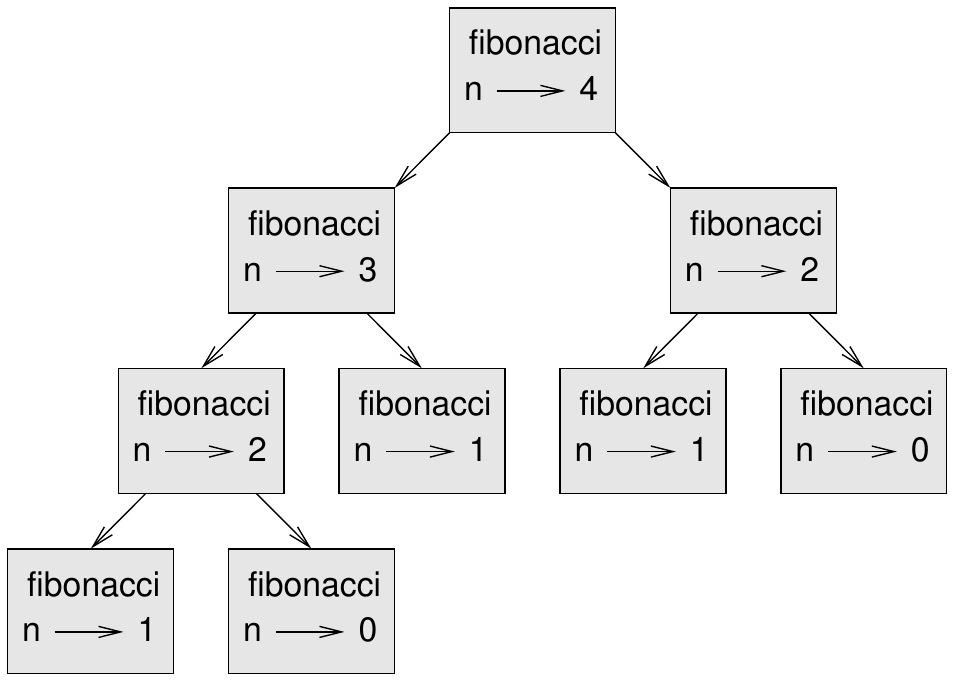
- Som vi kan se i eksemplet laver vi udregning af undertrået for $n=2$ mere end én gang, hvilket er spild af resurser i vores computer. For større startværdier $n>4$, vil resursespildet være endnu mere udtalt.

Én løsning på dette problem kan være at gemme funktionsværdier vi udregner så vi kan hente resultatet uden at beregne det igen. 
- Vi kan bruge en ordbog til at gemme sådanne værdier:

In [1]:
known = {0:0, 1:1}

def fibonacci_ny(n):
    if n in known:
        return known[n]
    res = fibonacci_ny(n-1) + fibonacci_ny(n-2)
    known[n] = res
    return res

Vi kan afprøve programmet for forskellige værdåer af $n$ og se hvordan ordbogen `known` udvides med de kendte værdier:

In [3]:
print(known)
fibonacci_ny(3)
print(known)
fibonacci_ny(5)
print(known)

{0: 0, 1: 1}
{0: 0, 1: 1, 2: 1, 3: 2}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5}


Vi kan prøve at sammenligne hvor stor en reduktion i afviklingstid vi får ved at bruge en indbygget kommando til at måle tid kaldet `timeit`. For at kunne lave en sammenligning er vi nødt til at definere den simple Fibonacci-funktion:

In [16]:
def fibonacci(n):
    if n < 2:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

Bemærk at `timeit`-kommandoen tager lidt tid at bruge da den kører funktionen mange gange og udregner middelværdi m.m. Typisk tager det 5-10 sek.

In [20]:
%timeit fibonacci(31)

352 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit fibonacci_ny(31)

89.1 ns ± 1.63 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


På min computer reduceres afviklingstiden fra $0.350$ sekund til $0.0001$ sekund, hvilket er en forbedring på mange tusinde procent.

## Globale variable
I det foregående eksempel med en variabel (`known`) defineret udenfor funktionen har vi en variabel, som er oprettet i den "øverste" programkontekst - kaldet `__main__`. Variable på dette niveau kan ses af alle funktioner.
- Dette er i modsætning til lokale variable som defineres inden i funktioner og "forsvinder", når deres funktion er slut. Dette kiggede vi på tilbage i lektion 2.
- Globale variable beholder deres indhold mellem funktionskald.
- Det er almindeligt at bruge globale variable til såkaldte "flag" - indstillinger, som bruges til at slå fælles indstillinger til eller fra.

Lad os prøve et eksempel hvor vi tilgår en global variabel:

In [24]:
verbose = True
def example1():
    if verbose:
        print('Running example1')
        
example1()

Running example1


Hvis vi vil ændre på indholdet af en global variabel kan vi godt komme galt afsted. Lad os studere det følgende eksempel:

In [27]:
been_called = False
def example2():
    been_called = True  # WRONG

In [28]:
example2()
print(been_called)

False


Selvom vi forsøgte at ændre værdien af den globale variabel `been_called` til `True` er den mod forventning ikke ændret inde i `example2()`-funktionen. 

Når vi på denne måde prøver at tildele en værdi til en global variabel inde i en funktion, bliver der blot oprettet en ny lokal variabel af samme navn, som forsvinder, når funktionen ender.

For at få adgang til at ændre en global variabel inde fra en funktion, skal vi først erklære den med nøgleordet `global` inde i funktionen. Dermed fortæller vi eksplicit at det er den globale variabel vi vil arbejde på.

In [31]:
been_called = False
def example2():
    global been_called
    been_called = True  # WRONG

In [29]:
example2()
been_called

False

Lad os se et andet eksempel, som demonstrerer, at variable oprettet i funktioner "overskygger" globale variable af samme navn:

In [30]:
count = 0
def example3():
    count = count + 1  # WRONG

In [31]:
example3()

UnboundLocalError: local variable 'count' referenced before assignment

Så snart vi opretter variablen `count` i funktionen `example3`, bliver den opfattet som en lokal variabel.  
Som sådan eksisterer den ikke i forvejen, og derfor kan vi ikke tilgå dens hidtidige værdi og lægge 1 til den.
Igen vil løsningen være, at erklære `count` global, hvis vi ønsker adgang til den:

In [32]:
def example3():
    global count
    count = count + 1

In [33]:
example3()
count

1

Hvis en global variabel ikke i sig selv indeholder en værdi, men *refererer* til en mutérbar værdi - tænk, via en datastruktur som liste eller ordbog - så kan den godt modificeres direkte fra en funktion.

In [105]:
ages = {'Anna':17, 'Birthe':18}
def example4():
    ages['Anna'] = 18

In [106]:
example4()
ages

{'Anna': 18, 'Birthe': 18}

Da `ages` bliver ved med at pege på den samme datastruktur (her en ordbog) anses denne operation ikke som en ændring af den globale variabel, selvom vi ændrer en værdi i ordbogen.

Man kan således tilføje, ændre og udskifte elementer i en datastruktur direkte, men hvis man vil tildele en ny værdi (et nyt objekt) til variablen, skal den erklæres global:

In [109]:
def example5():
    global ages
    ages = dict()
    
example5()
ages

{}

### Opsummering på globale variable
Globale variable kan være praktiske i enkelte sammenhænge.
- De kan også gøre programmer vanskeligere at overskue og debugge, hvis globale variable modificeres fra forskellige funktioner.
- Når f.eks. én funktion ændrer på en global variabel, kan det også ændre på, hvordan en anden funktion fungerer - måske utilsigtet.
- Derfor bør globale variable bruges med omtanke og ofte helt undgås, da det let kan gå hen at gøre programmeringen langt mere kompliceret, end man egentlig havde tænkt sig.
- Globale variable er aldrig nødvendige. I enkelte tilfælde kan de give mening, men som udgangspunkt skal I undgå dem.

# Del 2 - Tupler
Tupler minder rigtig meget om lister. Vi kan faktisk tænke på dem som *immuterbare lister*, eller med andre ord, **en liste der ikke kan ændres efter den er oprettet**.  
Tupler skrives som en sekvens af værdier adskilt af kommaer.

In [43]:
t = 'a', 'b', 'c', 'd', 'e'
t

('a', 'b', 'c', 'd', 'e')

Der er tradition for at sætte parentes om tupler, så de er lettere at kende, men parenteserne er ikke nødvendige:

In [44]:
t = ('a', 'b', 'c', 'd', 'e')
t

('a', 'b', 'c', 'd', 'e')

En tupel med ét enkelt element skal stadig skrives med et komma:

In [45]:
t1 = 'a',
type(t1)

tuple

En enkelt værdi i parentes er ikke en tupel:

In [46]:
t2 = ('a')
type(t2)

str

Man kan også oprette en tupel med den indbyggede funktion `tuple`. F.eks. kan man oprette en tom tupel således:

In [47]:
t = tuple()
t

()

`tuple` tager som argument en sekvens af værdier (hvad som helst der kan forstås som en sekvens - en tekststreng, en liste etc.).  
Den svarer dermed til funktionen `list` for lister:

In [48]:
t = tuple('lupins')
t

('l', 'u', 'p', 'i', 'n', 's')

De fleste operatorer, vi kender fra lister, fungerer også på tupler. F.eks. indeks ind i tupler:

In [49]:
t = ('a', 'b', 'c', 'd', 'e')
t[0]

'a'

...og slices af tupler:

In [50]:
t[1:3]

('b', 'c')

Vi kan se, at tupler er immuterbare:

In [51]:
t[0] = 'A'

TypeError: 'tuple' object does not support item assignment

Det er ligesom med tekststrenge. For at ændre en tupel bliver vi i stedet nødt til at skabe en ny tupel ud fra dele af en eksisterende:

In [52]:
t = ('A',) + t[1:]
t

('A', 'b', 'c', 'd', 'e')

Dette ændrer ikke på den oprindelige tupel `t` men erstatter den oprindelige tupel med en ny, tildeler den igen til variablen t og overskriver herved den tidligere tupel, som `t` refererede til.

Tupler kan også sammenlignes med de relationelle operatorer, som vi så for tekststrenge. Python starter med at sammenligne de første elementer fra hver sekvens. Hvis de er ens går den til de næste elementer og fortsætter indtil to elementer er forskellige. Efterfølgende elementer bliver ikke taget i betragtning (ligesom ved alfabetisk rækkefølge), uanset om det er meget store.

In [53]:
(0, 1, 2) < (0, 3, 4)

True

In [54]:
(0, 1, 2000000) < (0, 3, 4)

True

## Opgave 6

Definér to tupler med bogstaverne fra hhv. dit fornavn og efternavn og læg dem sammen til én tupel med hele dit navn, med et mellemrum imellem. Eksempel på resultat:

``('J', 'o', 'h', 'n', ' ', 'D', 'o', 'e')``

Lav mellemrummet __uden__ at bruge `tupel`-kommandoen.

Se svaret ved at klikke på "..." herunder. Men prøv først selv om du kan løse opgaven uden hjælp.

In [41]:
first = tuple('John')
last = tuple('Doe')
name = first + (' ',) + last
name

('J', 'o', 'h', 'n', ' ', 'D', 'o', 'e')

## Tildeling via tupler

Ved hjælp af tupler kan man tildele flere værdier til flere variable på én gang, f.eks.

In [55]:
a, b = 1, 2
a

1

In [56]:
b

2

Antallet af værdier skal naturligvis passe sammen:

In [57]:
a, b = 1, 2, 3

ValueError: too many values to unpack (expected 2)

Tildeling af værdier via tupler kan også udnyttes til let at bytte om på værdier af to variable. Hvor man ellers ville blive nødt til at arbejde med en lidt besværlig "mellem-variabel":

In [58]:
temp = a
a = b
b = temp
print(a,b)

2 1


...kan vi i stedet gøre:

In [59]:
b, a = a, b
print(a,b)

1 2


## Tupler som returværdier

Funktioner kan faktisk kun returnere én værdi / ét objekt ad gangen.
- Der er imidlertid ikke noget i vejen for, at dette objekt kan være en tupel.
- Derfor kan en funktion returnere en tupel med flere værdier i og i praksis fungere som om, den returnerer flere værdier på én gang.

In [60]:
t = divmod(7, 3)
t

(2, 1)

Vi kan bruge tupel-tildeling til at tildele de to værdier til separate variable:

In [61]:
quot, rem = divmod(7, 3)
quot

2

In [62]:
rem

1

Funktioner kan returnere tupler således:

In [43]:
def min_max(t):
    return min(t), max(t)

## Opgave 7

Lav en liste eller tupel af værdier og afprøv `min_max`-funktionen. Tildel retur-værdierne til variablene kaldet `min_a` og `max_a` og udskriv dem.

Se svaret ved at klikke på "..." herunder. Men prøv først selv om du kan løse opgaven uden hjælp.

In [47]:
a = (6,4,6,5,3,2,1,7,5,4)
min_a, max_a = min_max(a)
print(f'Minimum er {min_a}\nMaximum er {max_a}')

Minimum er 1
Maximum er 7


## Variabelt antal funktionsargumenter
Man kan også bruge tupler i forbindelse med argumenter til funktioner, så funktioner kan tage et variabelt antal argumenter.
- Operatoren `*` foran navnet på et argument *samler* argumenterne til funktionen i én tupel.

In [53]:
def printall(*args):
    print(args)

In [65]:
printall(1, 2.0, '3')

(1, 2.0, '3')


Man kan også *sprede* en tupel i enkelt-værdier, dvs. det modsatte af at *samle* dem.
- Værdier i en tupel *spredes* med samme operator `*`.

Hvis vi f.eks. gerne vil give argumenterne til `divmod` samlet som en tupel, virker det ikke umiddelbart:

In [66]:
t = (7, 3)
divmod(t)

TypeError: divmod expected 2 arguments, got 1

Det kan vi ikke på grund af måden, `divmod` er defineret på (den forventer to argumenter). Det kan vi tilpasse os ved at *sprede* tuplen til enkeltdele:

In [67]:
divmod(*t)

(2, 1)

## Keyword argumenter

Tilbage i lektion 2, hvor vi havde en case study fra kapitel 4 omkring at tegne med Turtle-modulet, lærte vi at man kan bruge såkaldte *keyword arguments* når man kalder en funktion. Så kan argumenterne gives i vilkårlig rækkefølge. Bemærk i eksemplet herunder hvordan det 2. kald til `print_navn` har argumenterne i omvendt rækkefølge men stadig giver samme resultat.

In [8]:
def print_navn(fornavn,efternavn):
    print(fornavn + ' ' + efternavn)
    
print_navn('John','Doe')

print_navn(efternavn='Doe', fornavn='John')

John Doe
John Doe


Hvis vi prøver at kalde `print_all`-funktionen fra før på denne måde får vi en fejl, da `third` ikke er defineret som muligt argument:

In [56]:
printall(1, 2.0, third='3')

TypeError: printall() got an unexpected keyword argument 'third'

Vi kan samle keyword argumenter ved at bruge `**`-operatoren på følgende måde:

In [6]:
def printall(*args, **kwargs):
    print(args)
    print(kwargs)

Kører vi nu funktionen igen på samme måde får vi et nyt resultat, hvor vores keyword argument er gemt i `kwargs` som er en ordbog:

In [7]:
printall(1, 2.0, third='3')

(1, 2.0)
{'third': '3'}


Hvis vi har en ordbog med keywords og værdier kan vi adskille dem med *scatter* operatoren `**`, hvis en funktion forventer flere argumenter, på følgende måde:

In [11]:
navn = {'fornavn': 'John', 'efternavn': 'Doe'}
print_navn(**navn)

John Doe


Havde vi bare kaldt funktionen med `navn` som argument, ville den fejle fordi den forventer to argumenter:

In [61]:
print_navn(navn)

TypeError: print_navn() missing 1 required positional argument: 'efternavn'

Metoden med at bruge ordbøger til at overlevere funktionsargumenter igennem kun én variable er meget anvendelig i større programmer hvor nogle funktioners virkemåde afhænger af et stort antal parametre. I stedet for at definere parametre som globale variable, som måske er den mest nærlæggende løsning, kan parametrene føres rundt på elegant vis igennem en ordbog.

## Standard-værdier til argumenter

Når man definerer en funktion kan man også angive standard-værdier for en funktions argumenter. Dette gør man som vist i følgende eksempel:

In [75]:
def afstand(x, y, x0=0 ,y0=0):
    print(f'x={x}, y={y}, x0={x0}, y0={y0}')
    return ((x-x0)**2 + (y-y0)**2)**0.5

Hvis vi kalder funktionen kun med de obligatoriske parametre `x` og `y`, benyttes standard-værdierne (default values) for `x0` og `y0` som er angivet i funktionsdefinitionen:

In [76]:
print(afstand(2,2))

x=2, y=2, x0=0, y0=0
2.8284271247461903


Hvis vi derimod kalder funktionen med fire argumenter, overskriver vi standardværdierne for `x0` og `y0` og disse bliver ignoreret.

In [77]:
print(afstand(2,2,1,1))

x=2, y=2, x0=1, y0=1
1.4142135623730951


I princippet kan vi også kalde funktionen med tre argumenter, selvom det måske virker lidt ulogisk i dette eksempel:

In [78]:
print(afstand(2,2,1))

x=2, y=2, x0=1, y0=0
2.23606797749979


Hvis vi ønsker at angive en bestemt værdi for y0, men vil benytte standardværdien for x0, er vi nødt til at være lidt mere eksplicitte og kalde funktionen med y0 som et keyword argument:

In [79]:
print(afstand(2,2,y0=1))

x=2, y=2, x0=0, y0=1
2.23606797749979


## Opgave 8

Revidér nedenstående program så udseendet af overskrifts-banneret kan ændres igennem standardparametre. Det kunne være parametre til at angive:
1. symbol (i stedet for `#`)
2. hvor mange symboler i træk
3. hvor mange mellemrum omkring titlen. 
Definér nogle passende parametre med standardværdier ligesom for `x` og `y` i `afstand`-eksemplet ovenfor.

In [117]:
def print_banner(s):
    symbols = 5*'#'
    spaces = 3*' '
    banner = symbols + spaces + s + spaces + symbols
    print(banner)
    
print_banner('Indledning')
print_banner('Konklusion')


#####   Indledning   #####
#####   Konklusion   #####


In [118]:
# Revideret udgave


In [119]:
# Prøv at kalde `print_banner` igen med ændrede parametre, så udseendet ændres



Se svaret ved at klikke på "..." herunder. Men prøv først selv om du kan løse opgaven uden hjælp.

In [12]:
# Revideret udgave
def print_banner(s, sym='#', n_space=3, n_sym=5):
    symbols = n_sym*sym
    spaces = n_space*' '
    banner = symbols + spaces + s + spaces + symbols
    print(banner)
    
# Vi kan stadig kalde funktionerne med kun s og så bruges standardværdier.
print_banner('Indledning')
print_banner('Konklusion')

#####   Indledning   #####
#####   Konklusion   #####


In [116]:
# Prøv at kalde `print_banner` igen med ændrede parametre, så udseendet ændres

# Vi kan omdefinere parametrene enten i rækkefølge eller som keyword arguments i vilkårlig rækkefølge:
print_banner('Indledning','*',4,7)
print_banner('Konklusion',n_sym=7,sym='*',n_space=4)

*******    Indledning    *******
*******    Konklusion    *******


# The end